In [1]:
# allows you to bring all the functions, classes, and variables defined in the "utils" module into the current namespace.
from utils import *

This code loads the data from two MATLAB files, applies dimensionality reduction techniques (PCA, LDA, t-SNE) to reduce the data to 2 dimensions, and then visualizes the reduced data in three separate subplots. A legend is added to indicate the class labels for better interpretation.

(8000, 49) (8000, 1)


findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


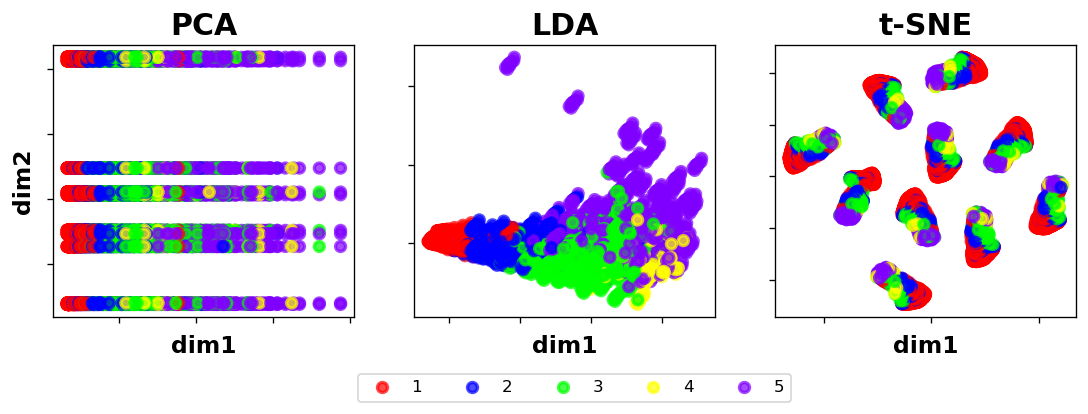

In [2]:
# Load data from "classification_data.mat" and "Class5.mat" files
X = sio.loadmat("classification_data")
y = sio.loadmat("Class5")

# Extracting the data arrays from the loaded MATLAB files
X = X["Xdata"]
y = y["Class5"]

# Printing the shapes of the data arrays for verification
print(X.shape, y.shape)

# Preprocessing the input data using Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)  # X_normalized

# Defining the class labels and colormap for the plot
labels = ['1', '2', '3', '4', '5']
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#ffff00', '#8000ff'])

# Applying Principal Component Analysis (PCA) to reduce data dimensions to 2
X_r = PCA(n_components=2).fit(X).transform(X)

# Applying Linear Discriminant Analysis (LDA) to reduce data dimensions to 2
X_r2 = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)

# Applying t-distributed Stochastic Neighbor Embedding (t-SNE) to reduce data dimensions to 2
X_r3 = TSNE(n_components=2, perplexity=100).fit_transform(X)

# Creating a 1x3 subplot grid to display the scatter plots for PCA, LDA, and t-SNE
fig, axes = plt.subplots(1, 3, figsize=(11, 3))

# Scatter plot for PCA
scatter0 = axes[0].scatter(X_r[:, 0], X_r[:, 1], c=y, alpha=0.7, lw=2, cmap=cm_bright)
axes[0].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[0].set_ylabel("dim2", fontweight='bold', fontsize=14)
axes[0].xaxis.set_major_formatter(NullFormatter())
axes[0].yaxis.set_major_formatter(NullFormatter())
axes[0].axis('tight')
axes[0].set_title("PCA", fontweight='bold', fontsize=18)

# Scatter plot for LDA
scatter1 = axes[1].scatter(X_r2[:, 0], X_r2[:, 1], c=y, alpha=0.7, lw=2, cmap=cm_bright)
axes[1].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[1].xaxis.set_major_formatter(NullFormatter())
axes[1].yaxis.set_major_formatter(NullFormatter())
axes[1].axis('tight')
axes[1].set_title("LDA", fontweight='bold', fontsize=18)

# Scatter plot for t-SNE
scatter2 = axes[2].scatter(X_r3[:, 0], X_r3[:, 1], c=y, alpha=0.7, lw=2, cmap=cm_bright)
axes[2].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[2].xaxis.set_major_formatter(NullFormatter())
axes[2].yaxis.set_major_formatter(NullFormatter())
axes[2].axis('tight')
axes[2].set_title("t-SNE", fontweight='bold', fontsize=18)

# Adding a legend to the plot indicating class labels
fig.legend(ncol=5, loc='lower center', bbox_to_anchor=(0.52, -0.135), shadow=False,
           scatterpoints=1, handles=scatter2.legend_elements()[0], labels=labels, fontsize=10)

# Displaying the plot
plt.show()


This code applies t-distributed Stochastic Neighbor Embedding (t-SNE) with different perplexity values to reduce the data to 2 dimensions. The reduced data is then visualized in four separate subplots, each corresponding to a different perplexity value. The legend is added to indicate the class labels for better interpretation.

(8000, 49) (8000, 1)


findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


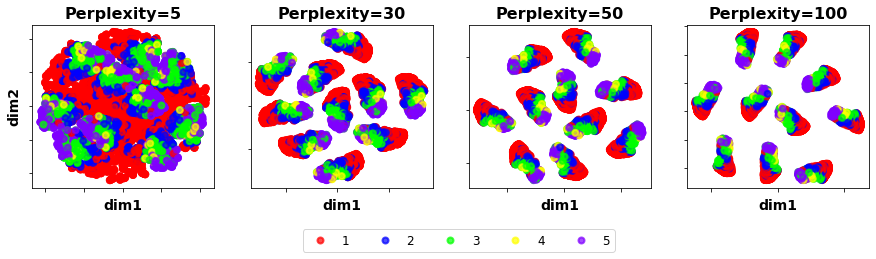

In [3]:
# Class labels and colormap for the scatter plots
labels = ['1', '2', '3', '4', '5']
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#ffff00', '#8000ff'])

# Create projection using t-SNE for different perplexity values
# Initialize a 1x4 subplot grid to display the scatter plots for different perplexity values
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# Iterate over different perplexity values: 5, 30, 50, 100
for i, perplexity in enumerate([5, 30, 50, 100]):
    # Apply t-SNE with the current perplexity value and fit_transform the data
    a = TSNE(n_components=2, init="random", perplexity=perplexity, learning_rate="auto").fit_transform(X)

    # Create the scatter plot using the reduced 2D data
    scatter = axes[i].scatter(a[:, 0], a[:, 1], c=y, alpha=0.7, lw=2, cmap=cm_bright)

    # Set the title for each subplot indicating the perplexity value
    axes[i].set_title("Perplexity=%d" % perplexity, fontweight='bold', fontsize=16)

    # Remove the axis tick labels (NullFormatter) for better visualization
    axes[i].xaxis.set_major_formatter(NullFormatter())
    axes[i].yaxis.set_major_formatter(NullFormatter())

    # Set the xlabel for each subplot
    axes[i].set_xlabel("dim1", fontweight='bold', fontsize=14)

# Set the ylabel for the entire figure (common for all subplots)
axes[0].set_ylabel("dim2", fontweight='bold', fontsize=14)

# Add a legend to the plot indicating class labels
fig.legend(ncol=5, loc='lower center', bbox_to_anchor=(0.52, -0.2), shadow=False,
           scatterpoints=1, handles=scatter.legend_elements()[0], labels=labels, fontsize=12)

# Display the plot
plt.show()


This code applies t-distributed Stochastic Neighbor Embedding (t-SNE) with different perplexity values to reduce the data to 2 dimensions. The reduced data is then visualized in four separate subplots, organized in a 2x2 grid. Each subplot corresponds to a specific perplexity value. The legend is added to indicate the class labels for better interpretation.

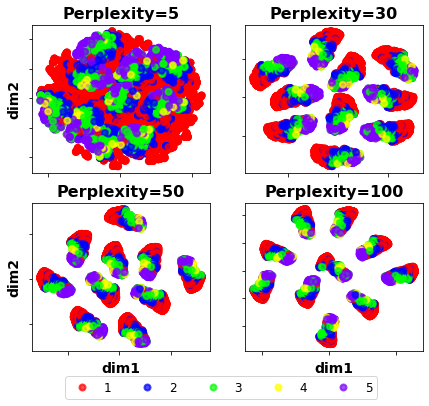

In [4]:
# Create a 2x2 subplot grid with a specific size for the figure
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

# Iterate over two different perplexity values: 5 and 30
for i, perplexity in enumerate([5, 30]):
    # Apply t-SNE with the current perplexity value and fit_transform the data
    a = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)

    # Create a scatter plot for the reduced 2D data, using the class labels 'y' for color
    scatter = axes[0][i].scatter(a[:, 0], a[:, 1], c=y, alpha=0.7, lw=2, cmap=cm_bright)

    # Set the title for each subplot indicating the perplexity value
    axes[0][i].set_title("Perplexity=%d" % perplexity, fontweight='bold', fontsize=16)

    # Remove the axis tick labels (NullFormatter) for better visualization
    axes[0][i].xaxis.set_major_formatter(NullFormatter())
    axes[0][i].yaxis.set_major_formatter(NullFormatter())

# Iterate over two different perplexity values: 50 and 100
for i, perplexity in enumerate([50, 100]):
    # Apply t-SNE with the current perplexity value and fit_transform the data
    a = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)

    # Create a scatter plot for the reduced 2D data, using the class labels 'y' for color
    scatter = axes[1][i].scatter(a[:, 0], a[:, 1], c=y, alpha=0.7, lw=2, cmap=cm_bright)

    # Set the title for each subplot indicating the perplexity value
    axes[1][i].set_title("Perplexity=%d" % perplexity, fontweight='bold', fontsize=16)

    # Remove the axis tick labels (NullFormatter) for better visualization
    axes[1][i].xaxis.set_major_formatter(NullFormatter())
    axes[1][i].yaxis.set_major_formatter(NullFormatter())

    # Set the xlabel for each subplot in the second row
    axes[1][i].set_xlabel("dim1", fontweight='bold', fontsize=14)

# Set the ylabel for the entire figure, which is common for the first column of subplots
axes[0][0].set_ylabel("dim2", fontweight='bold', fontsize=14)
axes[1][0].set_ylabel("dim2", fontweight='bold', fontsize=14)

# Add a legend to the plot indicating class labels
fig.legend(ncol=5, loc='lower center', bbox_to_anchor=(0.5, 0), shadow=False,
           scatterpoints=1, handles=scatter.legend_elements()[0], labels=labels, fontsize=12)

# Display the plot
plt.show()


This code demonstrates the visualization of PCA, LDA, and t-SNE on the imbalanced and balanced datasets. It first loads the data, preprocesses it using MinMaxScaler, and then splits it into training and testing sets. The imbalanced dataset is visualized with PCA, LDA, and t-SNE in the first row of subplots (option 3), while the balanced dataset is visualized in the second row of subplots (option 4) after applying SMOTE for balancing. The legend is added to indicate class labels for better interpretation.

(8000, 49) (8000, 1)


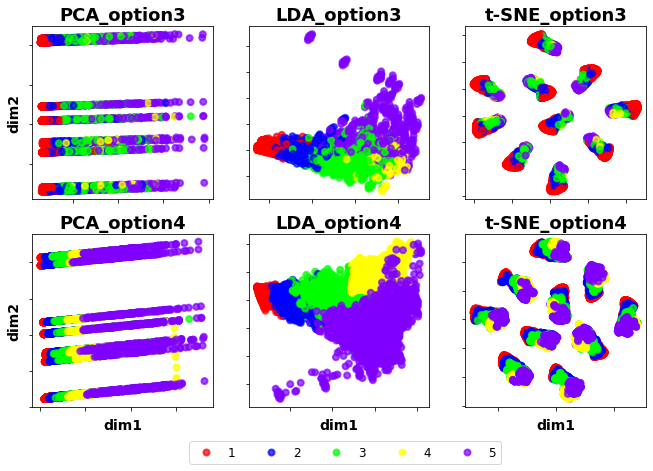

In [5]:
# Load data from the provided files using scipy.io.loadmat()
X = sio.loadmat("classification_data")
y = sio.loadmat("Class5")

# Extract the data from the loaded files
X = X["Xdata"]
y = y["Class5"]

# Print the shape of the data to get an idea of the number of samples and features
print(X.shape, y.shape)

# Use preprocessing to scale the data using MinMaxScaler or other techniques
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)  # X_normalized

# Define class labels and create a colormap for visualization
labels = ['1', '2', '3', '4', '5']
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#ffff00', '#8000ff'])

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Create a 2x3 subplot grid for visualizing PCA, LDA, and t-SNE with different options
fig, axes = plt.subplots(2, 3, figsize=(11, 7))

# Visualize PCA, LDA, and t-SNE on the imbalanced dataset (option 3)
X_r = PCA(n_components=2).fit(X_train).transform(X_train)
X_r2 = LinearDiscriminantAnalysis(n_components=2).fit(X_train, y_train).transform(X_train)
X_r3 = TSNE(n_components=2, perplexity=100).fit_transform(X_train)

scatter00 = axes[0][0].scatter(X_r[:, 0], X_r[:, 1], c=y_train, alpha=0.7, lw=2, cmap=cm_bright)
axes[0][0].set_ylabel("dim2", fontweight='bold', fontsize=14)
axes[0][0].xaxis.set_major_formatter(NullFormatter())
axes[0][0].yaxis.set_major_formatter(NullFormatter())
axes[0][0].axis('tight')
axes[0][0].set_title("PCA_option3", fontweight='bold', fontsize=18)

scatter01 = axes[0][1].scatter(X_r2[:, 0], X_r2[:, 1], c=y_train, alpha=0.7, lw=2, cmap=cm_bright)
axes[0][1].xaxis.set_major_formatter(NullFormatter())
axes[0][1].yaxis.set_major_formatter(NullFormatter())
axes[0][1].axis('tight')
axes[0][1].set_title("LDA_option3", fontweight='bold', fontsize=18)

scatter02 = axes[0][2].scatter(X_r3[:, 0], X_r3[:, 1], c=y_train, alpha=0.7, lw=2, cmap=cm_bright)
axes[0][2].xaxis.set_major_formatter(NullFormatter())
axes[0][2].yaxis.set_major_formatter(NullFormatter())
axes[0][2].axis('tight')
axes[0][2].set_title("t-SNE_option3", fontweight='bold', fontsize=18)

# Visualize PCA, LDA, and t-SNE on the balanced dataset (option 4)
# Apply Synthetic Minority Over-sampling Technique (SMOTE) to balance the training data
smote = SMOTE(random_state=0)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

X_r_bal = PCA(n_components=2).fit(X_train_bal).transform(X_train_bal)
X_r2_bal = LinearDiscriminantAnalysis(n_components=2).fit(X_train_bal, y_train_bal).transform(X_train_bal)
X_r3_bal = TSNE(n_components=2, perplexity=100).fit_transform(X_train_bal)

scatter10 = axes[1][0].scatter(X_r_bal[:, 0], X_r_bal[:, 1], c=y_train_bal, alpha=0.7, lw=2, cmap=cm_bright)
axes[1][0].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[1][0].set_ylabel("dim2", fontweight='bold', fontsize=14)
axes[1][0].xaxis.set_major_formatter(NullFormatter())
axes[1][0].yaxis.set_major_formatter(NullFormatter())
axes[1][0].axis('tight')
axes[1][0].set_title("PCA_option4", fontweight='bold', fontsize=18)

scatter11 = axes[1][1].scatter(X_r2_bal[:, 0], X_r2_bal[:, 1], c=y_train_bal, alpha=0.7, lw=2, cmap=cm_bright)
axes[1][1].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[1][1].xaxis.set_major_formatter(NullFormatter())
axes[1][1].yaxis.set_major_formatter(NullFormatter())
axes[1][1].axis('tight')
axes[1][1].set_title("LDA_option4", fontweight='bold', fontsize=18)

scatter12 = axes[1][2].scatter(X_r3_bal[:, 0], X_r3_bal[:, 1], c=y_train_bal, alpha=0.7, lw=2, cmap=cm_bright)
axes[1][2].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[1][2].xaxis.set_major_formatter(NullFormatter())
axes[1][2].yaxis.set_major_formatter(NullFormatter())
axes[1][2].axis('tight')
axes[1][2].set_title("t-SNE_option4", fontweight='bold', fontsize=18)

# Add a legend to the plot indicating class labels
fig.legend(ncol=5, loc='lower center', bbox_to_anchor=(0.52, 0), shadow=False,
           scatterpoints=1, handles=scatter10.legend_elements()[0], labels=labels, fontsize=12)

# Display the plot
plt.show()


The code defines a list of classifiers, where each classifier is an instance of different machine learning algorithms such as K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), Multi-Layer Perceptron (MLP), and AdaBoost. Additionally, the code initializes MinMaxScaler and SMOTE instances for data preprocessing. It also defines a function (DR) for dimensionality reduction, which allows reducing the dimensionality of the input features using three methods: t-SNE, PCA, and LDA.

In [5]:
# Different Classifiers
# Define a list of classifier names and a corresponding list of classifier instances
names = ["KNN", "SVM", "DT", "RF", "MLP", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
]

# Initialize MinMaxScaler and SMOTE instances for data preprocessing
min_max_scaler = MinMaxScaler()
smote = SMOTE(random_state=0)

# Define a function for dimensionality reduction (DR)
# This function takes the input features X, class labels y, and a dimensionality reduction method name
# It reduces the dimensionality of the input features based on the specified method and returns the reduced features and class labels
# Supported methods: 'TSNE', 'PCA', and 'LDA'
n_components = 2
def DR(X, y, method, n_components=n_components):
    if method == 'TSNE':
        X = TSNE(n_components=n_components, perplexity=100).fit_transform(X)  # method='exact',
    if method == 'PCA':
        X = PCA(n_components=n_components).fit_transform(X)
    if method == 'LDA':
        X = LinearDiscriminantAnalysis(n_components=n_components).fit(X, y).transform(X)
    return X, y


The code runs different experiments for options 1, 2, 3, and 4 with varying trial numbers. It computes the corresponding results for each option and stores them in different variables for further analysis. The experiments include different dimensionality reduction techniques such as PCA, LDA, and t-SNE, and the number of components used in the dimensionality reduction is set to 2.

In [6]:
n_trial=5

op1_result_5=option1(X,y)
op2_result_5=option2(X,y)
op3_PCA_result=option3(X,y,method='PCA',n_components=2)
op3_LDA_result=option3(X,y,method='LDA',n_components=2)
op4_PCA_result=option4(X,y,method='PCA',n_components=2)
op4_LDA_result=option4(X,y,method='LDA',n_components=2)
n_trial=1
op4_TSNE_result=option4(X,y,method='TSNE',n_components=2)
op3_TSNE_result=option3(X,y,method='TSNE',n_components=2)

In [171]:
# Order: pre,rec,f1,accuracy,auc,running time
op3_LDA_result

[['KNN', array([0.77, 0.77, 0.77, 0.68, 0.92, 0.08])],
 ['SVM', array([0.81, 0.81, 0.81, 0.71, 0.96, 2.81])],
 ['DT', array([0.77, 0.79, 0.78, 0.64, 0.96, 0.02])],
 ['RF', array([0.81, 0.81, 0.81, 0.7 , 0.96, 0.04])],
 ['MLP', array([0.81, 0.81, 0.81, 0.7 , 0.97, 2.08])],
 ['AdaBoost', array([0.78, 0.75, 0.74, 0.72, 0.78, 0.2 ])]]

# 8class_TowerDamage

The code performs various experiments on the Class8 data using different options (option1, option2, option3, and option4) and different dimensionality reduction techniques (PCA, LDA, and t-SNE). The number of components used in the dimensionality reduction is set to n_components. The results of each experiment are stored in different variables for further analysis.

In [139]:
# Load the data for Class8 (commented out X as it was already loaded)
y = sio.loadmat("Class8")
y = y["Class8"]

# Number of trials for running the experiments
n_trial = 5

# Order: pre, rec, f1, accuracy, auc, running time
# Option 1 result with Class8 data
op1_result_8 = option1(X, y)

# Option 2 result with Class8 data
op2_result_8 = option2(X, y)

# Option 3 result with PCA as the dimensionality reduction method and Class8 data (n_components=n_components)
op3_PCA_result_8 = option3(X, y, method='PCA', n_components=n_components)

# Option 3 result with LDA as the dimensionality reduction method and Class8 data (n_components=n_components)
op3_LDA_result_8 = option3(X, y, method='LDA', n_components=n_components)

# Option 4 result with PCA as the dimensionality reduction method and Class8 data (n_components=n_components)
op4_PCA_result_8 = option4(X, y, method='PCA', n_components=n_components)

# Option 4 result with LDA as the dimensionality reduction method and Class8 data (n_components=n_components)
op4_LDA_result_8 = option4(X, y, method='LDA', n_components=n_components)

# Set n_trial to 1 for the following experiments
n_trial = 1

# Option 4 result with t-SNE as the dimensionality reduction method and Class8 data (n_components=n_components)
op4_TSNE_result_8 = option4(X, y, method='TSNE', n_components=n_components)

# Option 3 result with t-SNE as the dimensionality reduction method and Class8 data (n_components=n_components)
op3_TSNE_result_8 = option3(X, y, method='TSNE', n_components=n_components)


In [144]:
op3_PCA_result_8

[['KNN', array([0.45, 0.49, 0.47, 0.33, 0.77, 0.09])],
 ['SVM', array([0.45, 0.54, 0.47, 0.35, 0.87, 5.35])],
 ['DT', array([0.55, 0.6 , 0.56, 0.42, 0.89, 0.02])],
 ['RF', array([0.48, 0.49, 0.39, 0.29, 0.82, 0.04])],
 ['MLP', array([0.43, 0.54, 0.46, 0.35, 0.88, 1.91])],
 ['AdaBoost', array([0.15, 0.27, 0.19, 0.2 , 0.73, 0.22])]]

In [141]:
op3_LDA_result_8

[['KNN', array([0.82, 0.82, 0.82, 0.76, 0.96, 0.1 ])],
 ['SVM', array([0.82, 0.82, 0.82, 0.75, 0.98, 4.68])],
 ['DT', array([0.74, 0.74, 0.73, 0.6 , 0.95, 0.03])],
 ['RF', array([0.68, 0.68, 0.66, 0.53, 0.94, 0.05])],
 ['MLP', array([0.77, 0.77, 0.77, 0.69, 0.97, 3.05])],
 ['AdaBoost', array([0.53, 0.61, 0.55, 0.49, 0.81, 0.31])]]

In [142]:
op4_PCA_result_8

[['KNN', array([0.48, 0.45, 0.46, 0.32, 0.75, 0.1 ])],
 ['SVM', array([ 0.53,  0.48,  0.49,  0.38,  0.87, 19.06])],
 ['DT', array([0.61, 0.52, 0.55, 0.44, 0.89, 0.06])],
 ['RF', array([0.54, 0.43, 0.44, 0.38, 0.83, 0.07])],
 ['MLP', array([0.47, 0.45, 0.45, 0.36, 0.87, 2.96])],
 ['AdaBoost', array([0.31, 0.3 , 0.27, 0.26, 0.69, 0.36])]]

In [143]:
op4_LDA_result_8

[['KNN', array([0.82, 0.82, 0.82, 0.78, 0.94, 0.13])],
 ['SVM', array([ 0.83,  0.82,  0.82,  0.78,  0.98, 11.01])],
 ['DT', array([0.75, 0.71, 0.71, 0.72, 0.95, 0.07])],
 ['RF', array([0.73, 0.71, 0.71, 0.71, 0.95, 0.09])],
 ['MLP', array([0.77, 0.75, 0.76, 0.75, 0.97, 4.86])],
 ['AdaBoost', array([0.13, 0.26, 0.12, 0.38, 0.74, 0.54])]]

In [133]:
# op4_TSNE_result_8

In [134]:
# op3_TSNE_result_8

# Classifier Comparison

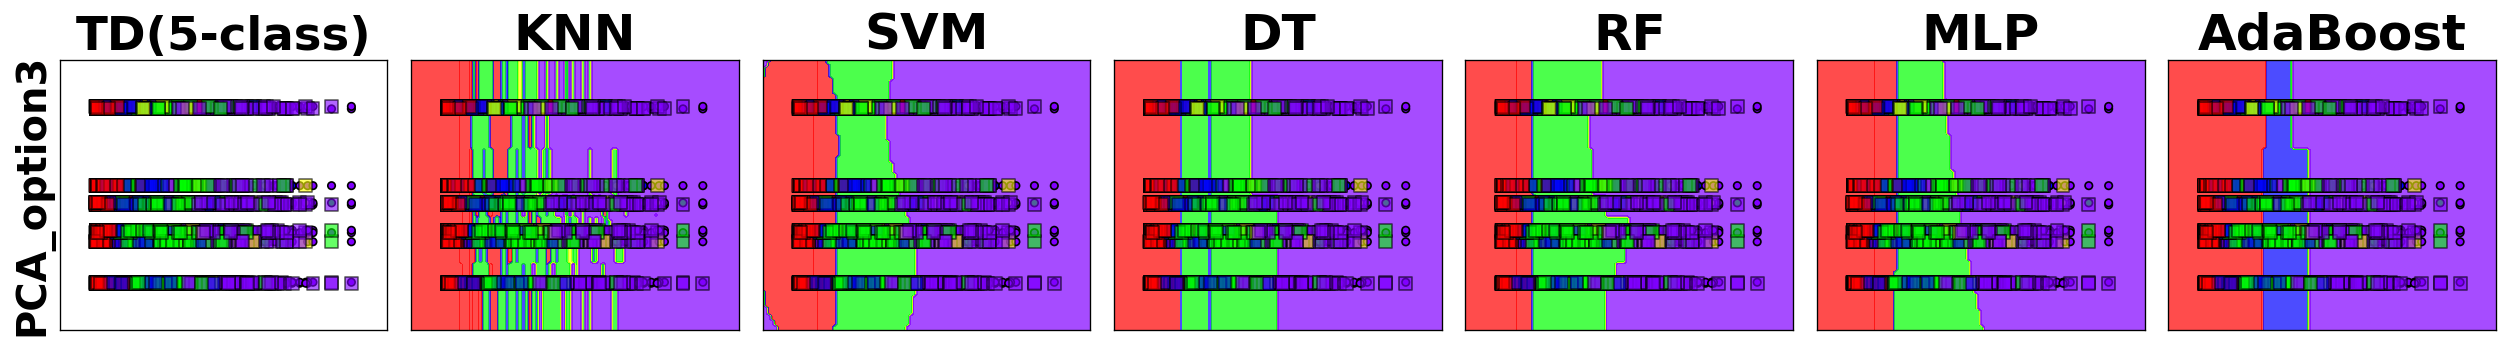

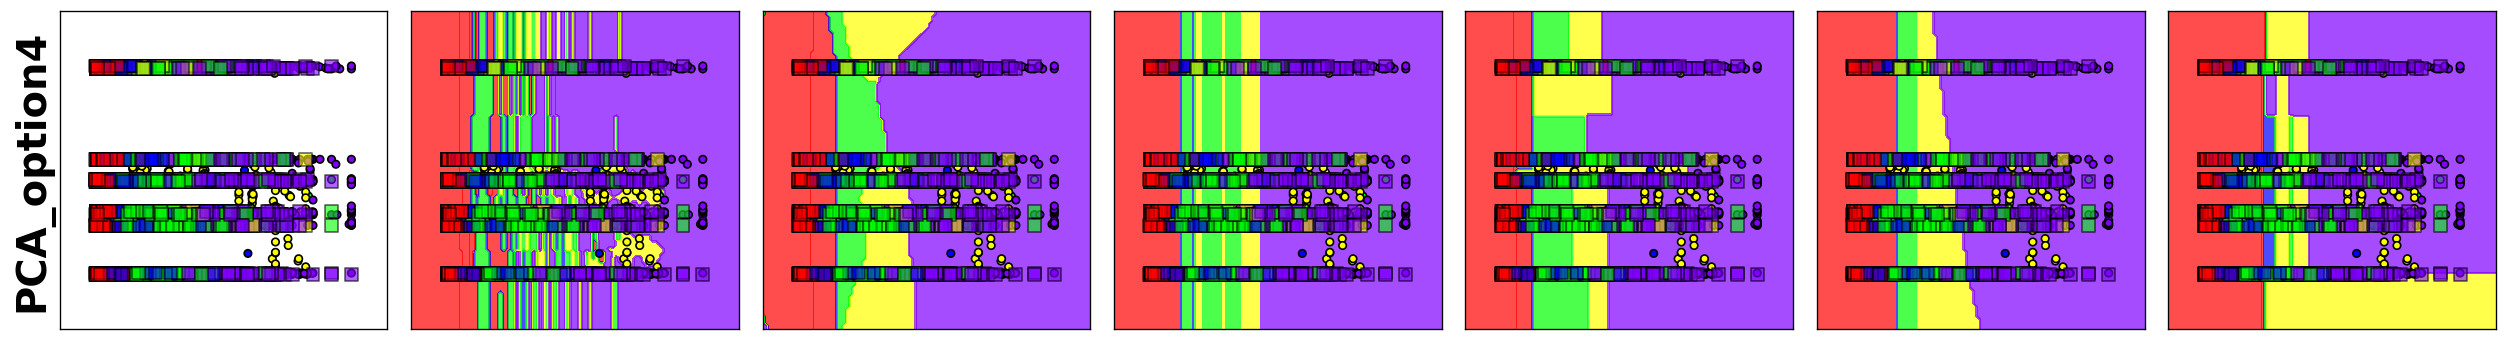

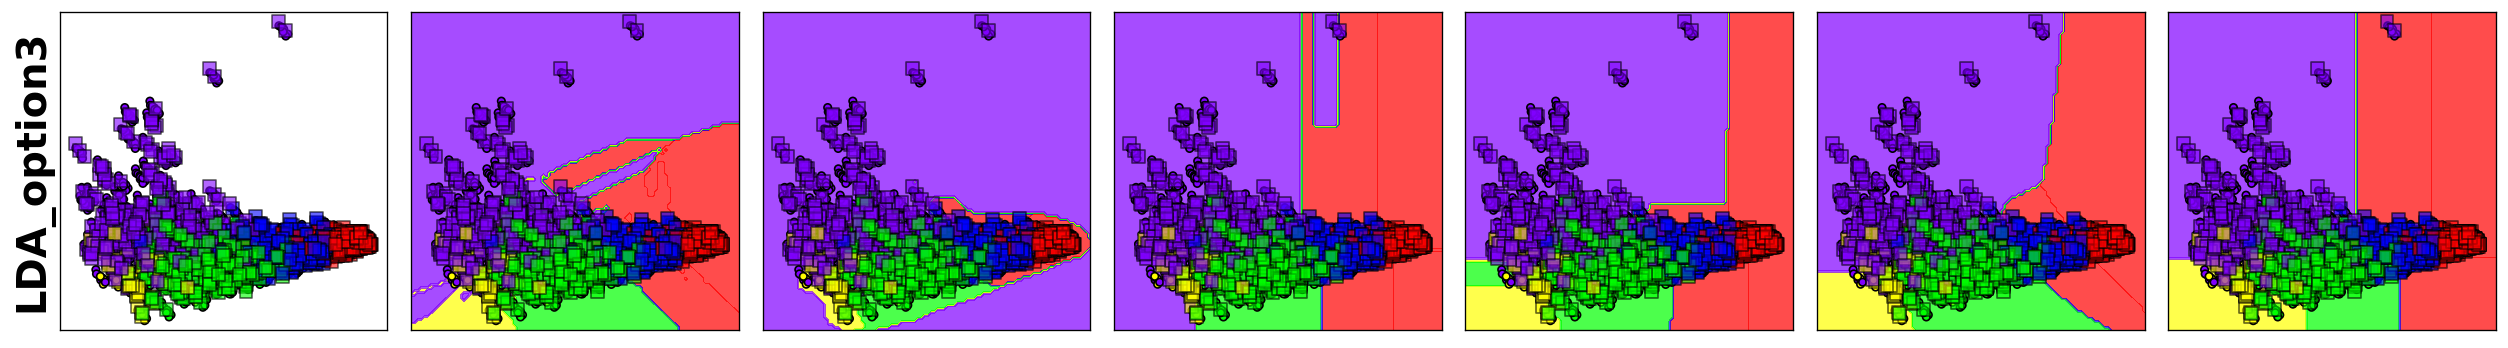

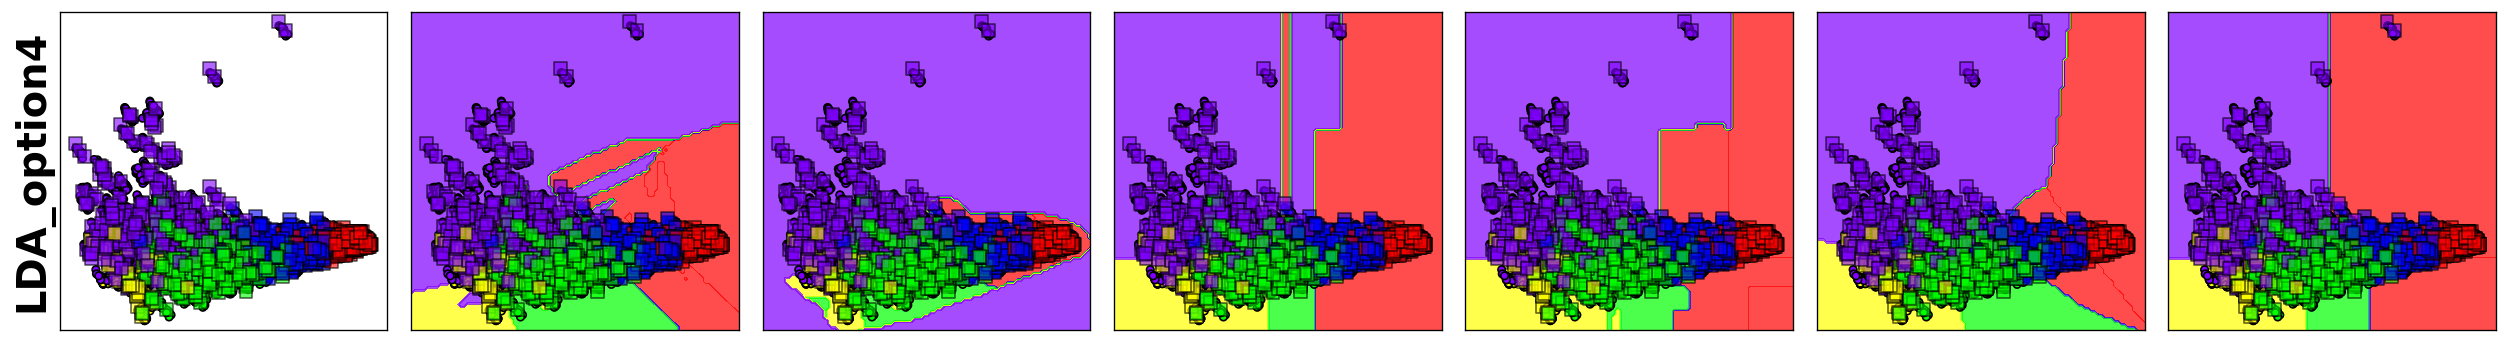

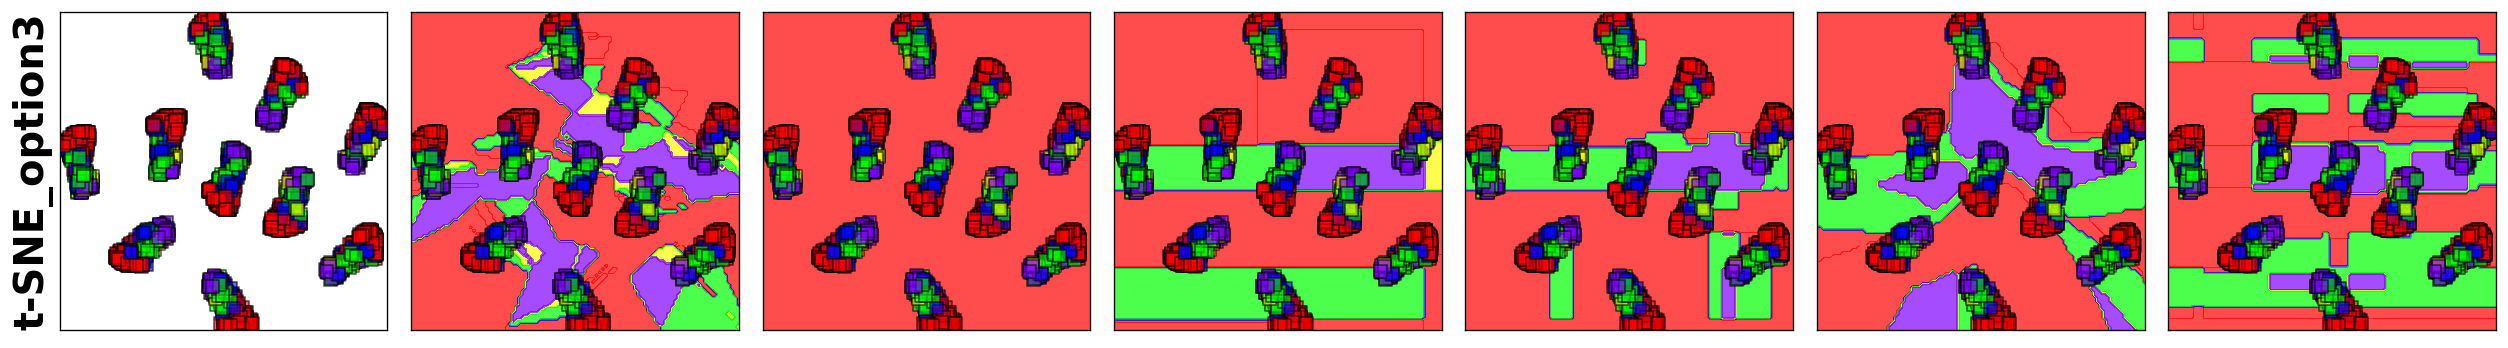

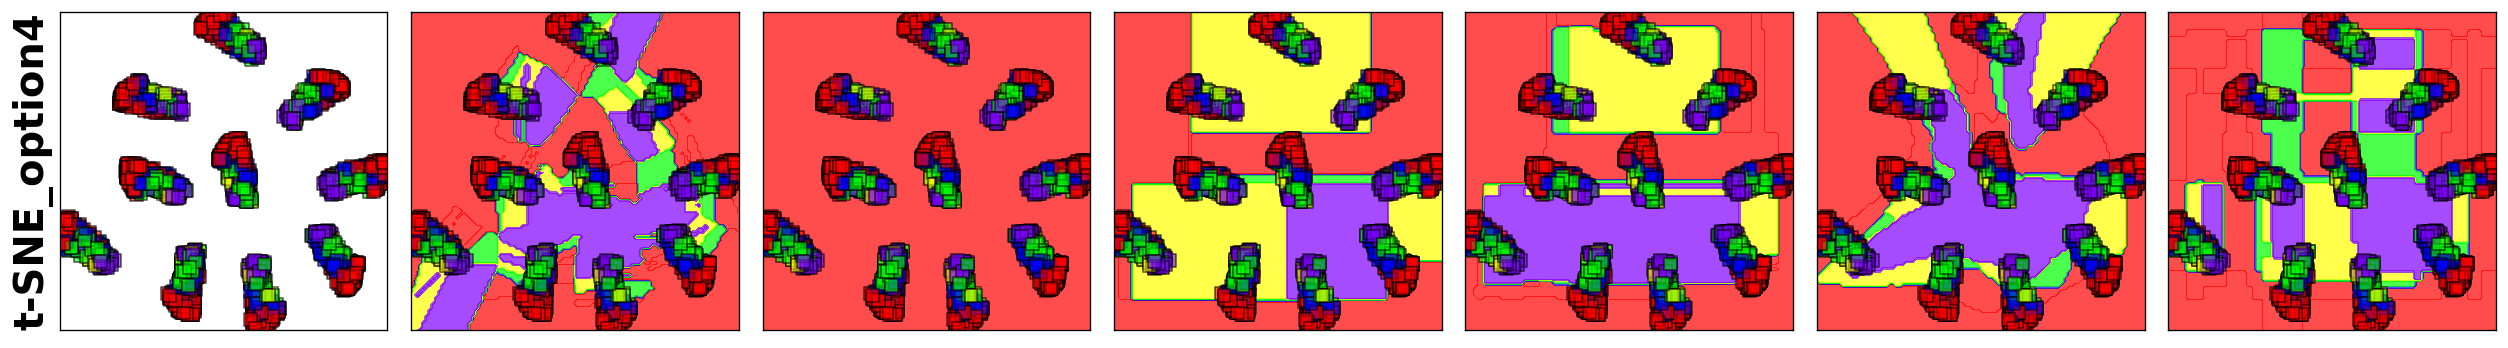

In [9]:
# The code creates a figure with multiple subplots to visualize the classification results using different 
# classifiers and dimensionality reduction techniques (PCA with n_components=2). The datasets are preprocessed, 
# split into training and test sets, and the decision boundaries for each classifier are plotted along with the 
# training and testing points. The first row of subplots displays the original dataset with the PCA-transformed 
# data. The subsequent rows show the decision boundaries for each classifier on the PCA-transformed data.
# Load data
X = sio.loadmat("classification_data")
y = sio.loadmat("Class5")
X = X["Xdata"]
y = y["Class5"]

# Create a list of datasets with X and y
datasets = [(X, y)]

# Set the colormap for plotting
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#ffff00', '#8000ff'])

# Create the figure to display the plots
figure = plt.figure(figsize=(21, 3))

# Initialize the subplot index
i = 1

# Iterate over the datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset and split it into training and test parts
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X, y = DR(X, y, method='PCA', n_components=2)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

    # Define the range for plot limits
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("TD(5-class)", fontweight='bold', fontsize=28)
        ax.set_ylabel("PCA_option3", fontweight='bold', fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")

    # Set plot limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    # Increment the subplot index
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Create a subplot for each classifier
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf', response_method="predict", cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        # Set plot limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

        # Set the title for the first row of subplots with classifier names
        if ds_cnt == 0:
            ax.set_title(name, fontweight='bold', fontsize=30)

        # Increment the subplot index
        i += 1

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# PCA_option4
figure = plt.figure(figsize=(21, 3))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset and split it into training and test parts
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X, y = DR(X, y, method='PCA', n_components=2)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)
    
    # Apply SMOTE (Synthetic Minority Over-sampling Technique) on the training data to balance classes
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Define the range for plot limits
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_ylabel("PCA_option4", fontweight='bold', fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    # Set plot limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Create a subplot for each classifier
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf', response_method="predict", cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        # Set plot limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()
# The code visualizes the classification results using different classifiers on the LDA-transformed data 
# (LDA_option3). The dataset is preprocessed, split into training and test sets, and LDA is applied to reduce 
# the dimensionality of the data to 2. The decision boundaries for each classifier are plotted along with the 
# training and testing points on the LDA-transformed data.
#LDA_option3
# LDA_option3
figure = plt.figure(figsize=(21, 3))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset and split it into training and test parts
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X, y = DR(X, y, method='LDA', n_components=2)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)
    
    # Define the range for plot limits
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_ylabel("LDA_option3", fontweight='bold', fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    # Set plot limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Create a subplot for each classifier
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf', response_method="predict", cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        # Set plot limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()

# The code visualizes the classification results using different classifiers on the LDA-transformed data 
# (LDA_option4). The dataset is preprocessed, split into training and test sets, and LDA is applied to reduce 
# the dimensionality of the data to 2. Synthetic Minority Over-sampling Technique (SMOTE) is applied to balance
# the training data. The decision boundaries for each classifier are plotted along with the training and testing
# points on the LDA-transformed and balanced data.
# LDA_option4
figure = plt.figure(figsize=(21, 3))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset and split it into training and test parts
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X, y = DR(X, y, method='LDA', n_components=2)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)
    
    # Apply Synthetic Minority Over-sampling Technique (SMOTE) on training data
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Define the range for plot limits
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_ylabel("LDA_option4", fontweight='bold', fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    # Set plot limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Create a subplot for each classifier
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf', response_method="predict", cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        # Set plot limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()
    
# The code visualizes the classification results using different classifiers on the t-SNE-transformed data 
# (t-SNE_option3). The dataset is preprocessed, split into training and test sets, and t-SNE is applied to 
# reduce the dimensionality of the data to 2. The decision boundaries for each classifier are plotted along with
# the training and testing points on the t-SNE-transformed data.
# t-SNE_option3
figure = plt.figure(figsize=(21, 3))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset and split it into training and test parts
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X, y = DR(X, y, method='TSNE', n_components=2)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)
    
    # Define the range for plot limits
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_ylabel("t-SNE_option3", fontweight='bold', fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    # Set plot limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Create a subplot for each classifier
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf', response_method="predict", cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        # Set plot limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()
# The code visualizes the classification results using different classifiers on the t-SNE-transformed data 
# with synthetic minority oversampling (t-SNE_option4). The dataset is preprocessed, split into training and 
# test sets, t-SNE is applied to reduce the dimensionality of the data to 2, and SMOTE is applied to balance the
# dataset. The decision boundaries for each classifier are plotted along with the training and testing points on
# the t-SNE-transformed and balanced data.
# t-SNE_option4
figure = plt.figure(figsize=(21, 3))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset and split it into training and test parts
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X, y = DR(X, y, method='TSNE', n_components=2)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Define the range for plot limits
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_ylabel("t-SNE_option4", fontweight='bold', fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    # Set plot limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Create a subplot for each classifier
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf', response_method="predict", cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='s', s=60, c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        # Set plot limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()
